C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_14052\4030036411.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_14052\4030036411.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_14052\4030036411.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 143280, number of used features: 22
[LightGBM] [Info] Start training from score 41.117106
LightGBM RMSE: 2.955178744578654
LightGBM MAE: 2.3424867173200856
LightGBM R²: 0.9741217426406437


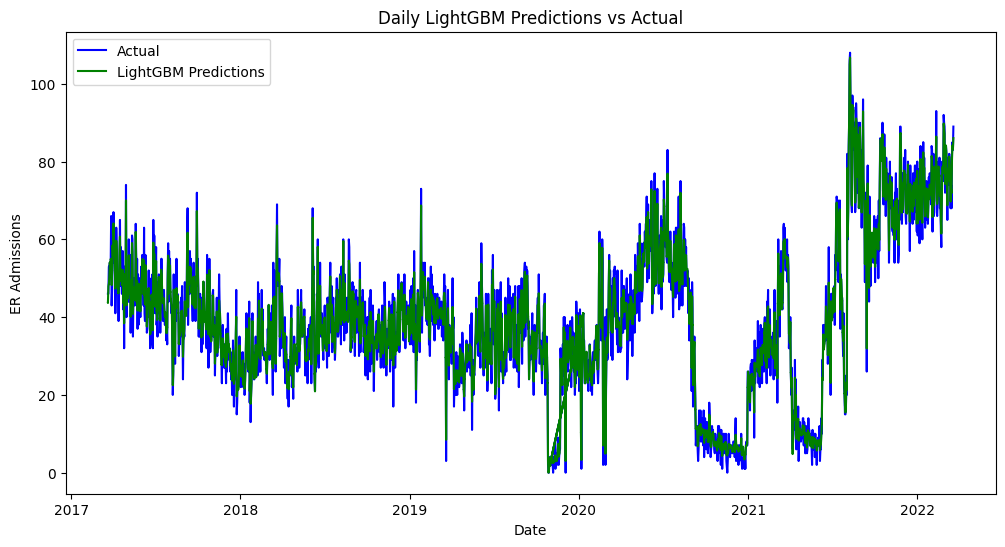

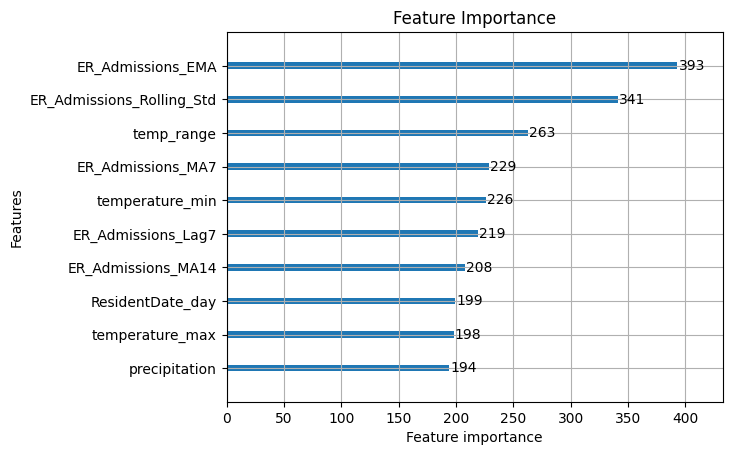

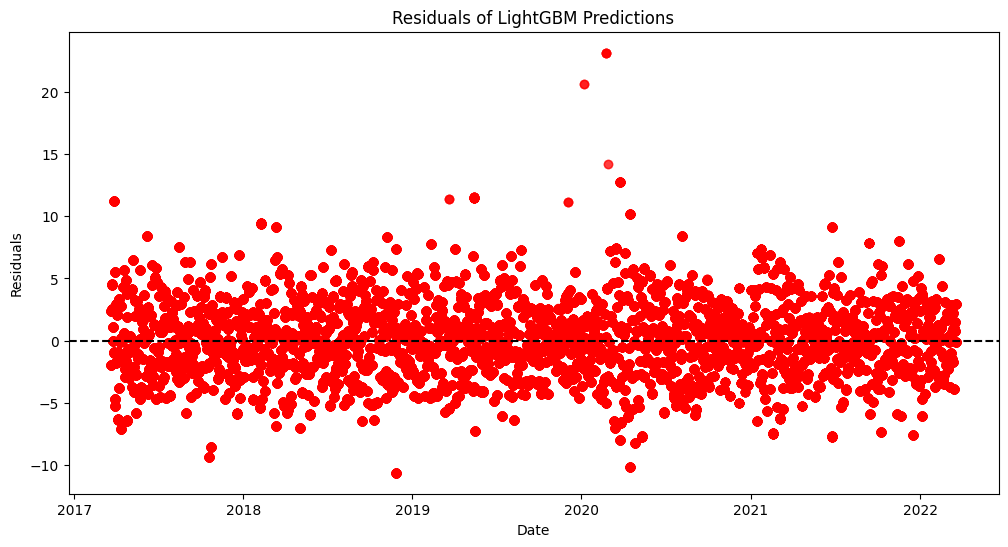

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# ========== Train the LightGBM Model ==========
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X, y)
lgb_pred = lgb_model.predict(X)

# Calculate performance metrics
lgb_rmse = np.sqrt(mean_squared_error(y, lgb_pred))
mae = mean_absolute_error(y, lgb_pred)
r2 = r2_score(y, lgb_pred)

print(f"LightGBM RMSE: {lgb_rmse}")
print(f"LightGBM MAE: {mae}")
print(f"LightGBM R²: {r2}")

# ========== Prepare Results for Daily Predictions ==========
# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y,
    'LightGBM_Pred': lgb_pred
}, index=y.index)

# ========== Plot Daily Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['LightGBM_Pred'], label='LightGBM Predictions', color='green')
plt.legend()
plt.title("Daily LightGBM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y - lgb_pred

plt.figure(figsize=(12, 6))
plt.scatter(results.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of LightGBM Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_14052\975035589.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_14052\975035589.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_14052\975035589.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 114624, number of used features: 21
[LightGBM] [Info] Start training from score 37.338725
LightGBM RMSE: 10.140683125063621
LightGBM MAE: 7.466070804116712
LightGBM R²: 0.8433016259627859


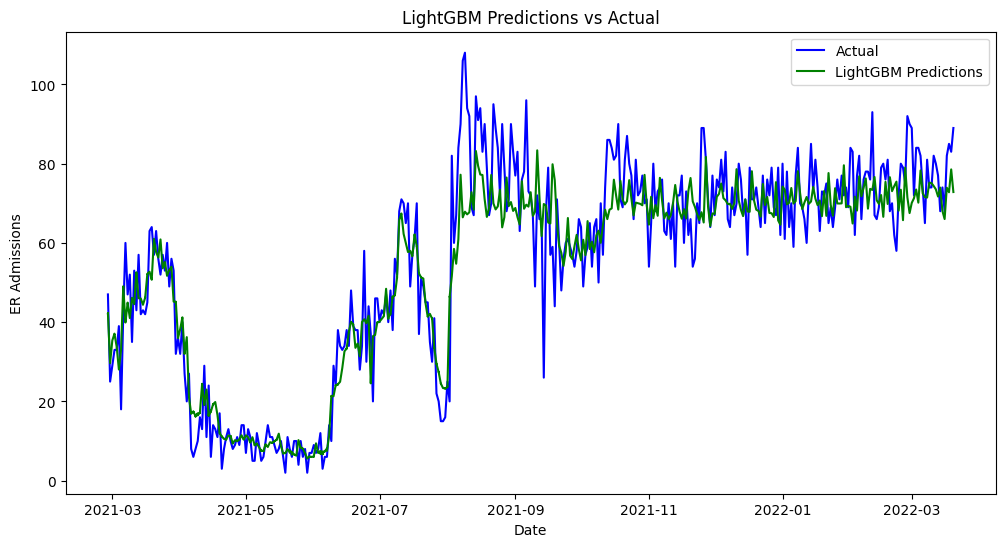

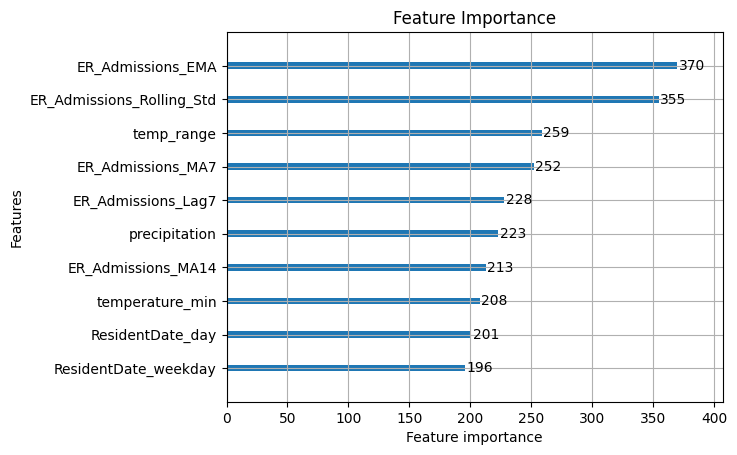

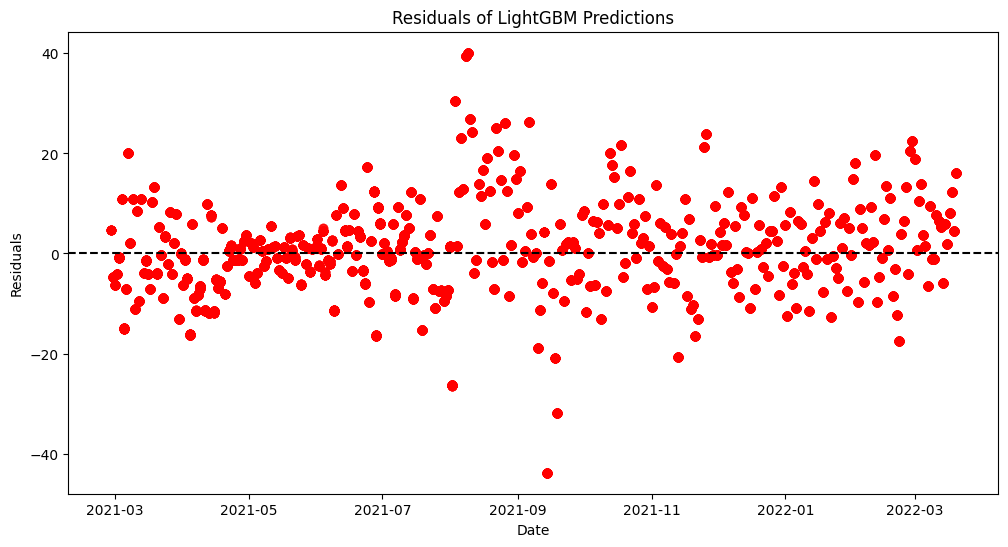

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split (Time series typically uses time order, so don't shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ========== Train the LightGBM Model ==========
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Calculate performance metrics
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
mae = mean_absolute_error(y_test, lgb_pred)
r2 = r2_score(y_test, lgb_pred)

print(f"LightGBM RMSE: {lgb_rmse}")
print(f"LightGBM MAE: {mae}")
print(f"LightGBM R²: {r2}")

# ========== Plot Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, lgb_pred, label='LightGBM Predictions', color='green')
plt.legend()
plt.title("LightGBM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y_test - lgb_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of LightGBM Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_15524\2500305262.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_15524\2500305262.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_15524\2500305262.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 114624, number of used features: 21
[LightGBM] [Info] Start training from score 37.338725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

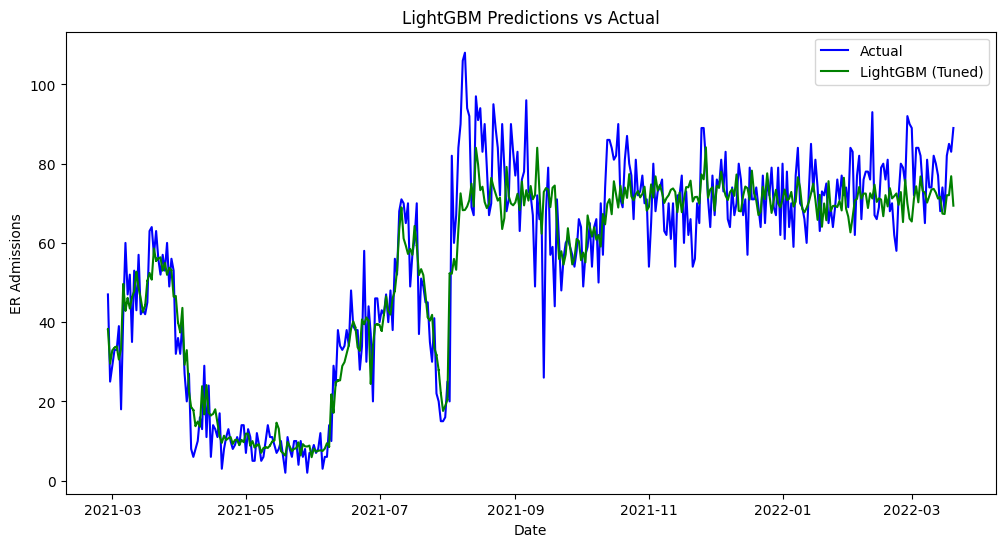

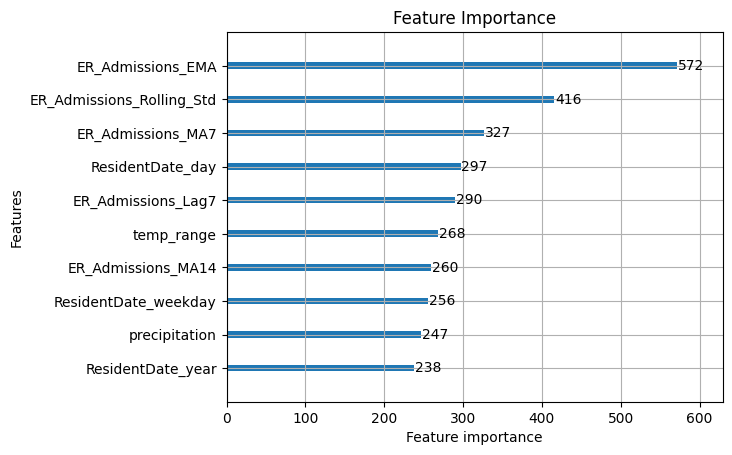

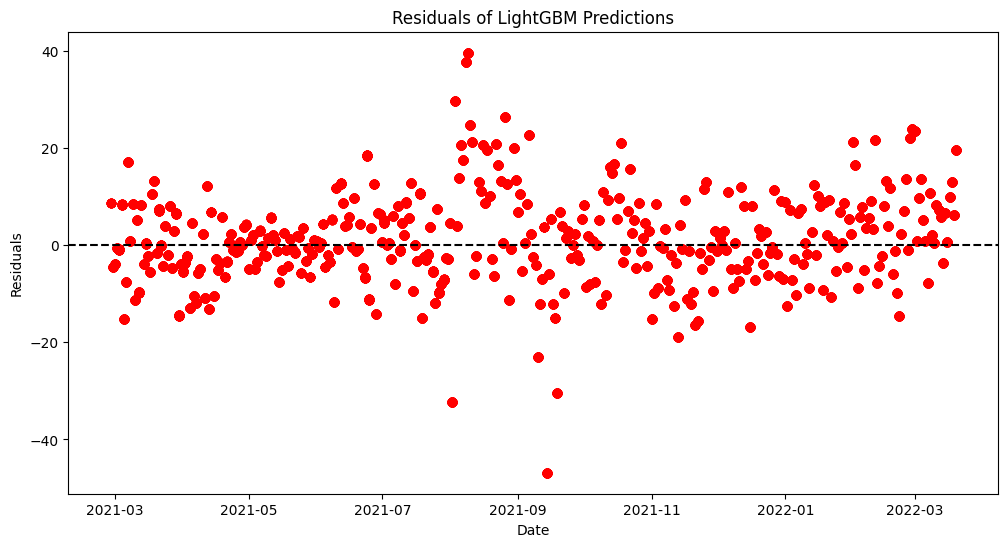

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split (Time series typically uses time order, so don't shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ========== Hyperparameter Tuning for LightGBM ==========

# Define hyperparameters grid for LightGBM
lgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV for LightGBM
lgb_grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=lgb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
lgb_grid_search.fit(X_train, y_train)

# Best LightGBM hyperparameters
print(f"Best LightGBM Parameters: {lgb_grid_search.best_params_}")

# Best model predictions
lgb_best_model = lgb_grid_search.best_estimator_
lgb_pred = lgb_best_model.predict(X_test)

# Calculate performance metrics
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
mae = mean_absolute_error(y_test, lgb_pred)
r2 = r2_score(y_test, lgb_pred)

print(f"LightGBM RMSE after Hyperparameter Tuning: {lgb_rmse}")
print(f"LightGBM MAE after Hyperparameter Tuning: {mae}")
print(f"LightGBM R² after Hyperparameter Tuning: {r2}")

# ========== Plot Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, lgb_pred, label='LightGBM (Tuned)', color='green')
plt.legend()
plt.title("LightGBM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
lgb.plot_importance(lgb_best_model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y_test - lgb_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of LightGBM Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_15524\2770901025.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_15524\2770901025.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_15524\2770901025.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 114624, number of used features: 21
[LightGBM] [Info] Start training from score 37.338725
LightGBM RMSE on Test Set: 10.389653626738426
LightGBM MAE on Test Set: 7.4068310318974495
LightGBM R² on Test Set: 0.8518124096940007


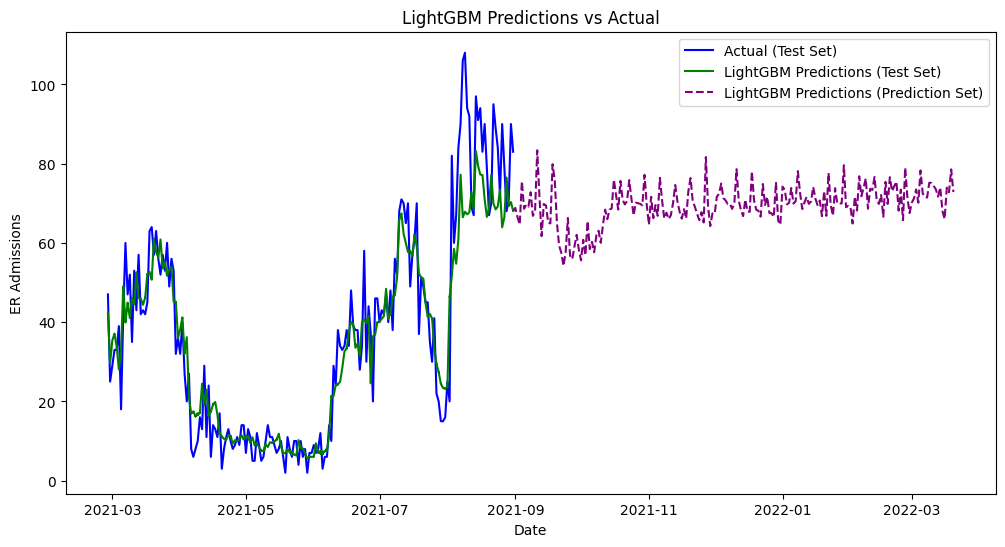

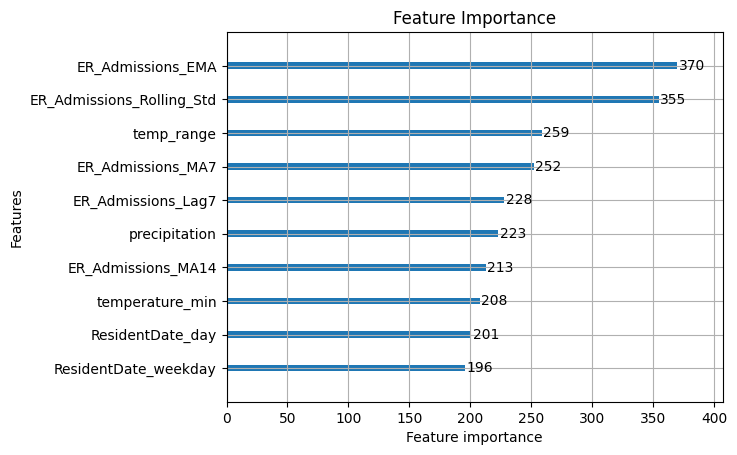

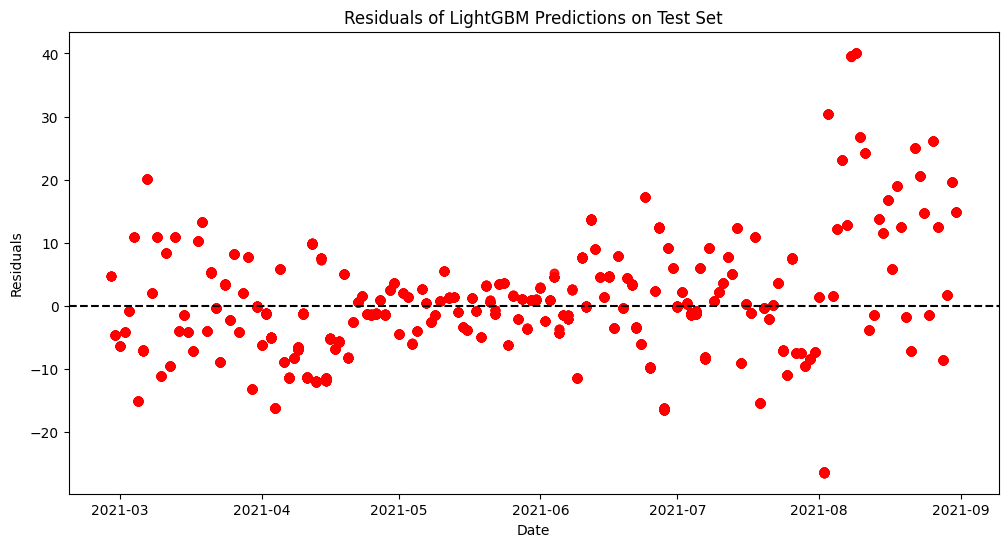

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
categorical_columns = X.select_dtypes(include=['object']).columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Split the data into 80% training, 10% testing, and 10% for predictions
train_size = int(len(X) * 0.8)
test_size = int(len(X) * 0.1)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:train_size + test_size]
y_test = y.iloc[train_size:train_size + test_size]

X_pred = X.iloc[train_size + test_size:]

# ========== Train the LightGBM Model ==========
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_test_pred = lgb_model.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))
print(f"LightGBM RMSE on Test Set: {lgb_rmse}")

# Calculate additional metrics
mae = mean_absolute_error(y_test, lgb_test_pred)
r2 = r2_score(y_test, lgb_test_pred)

print(f"LightGBM MAE on Test Set: {mae}")
print(f"LightGBM R² on Test Set: {r2}")

# Make predictions on the prediction set
lgb_pred = lgb_model.predict(X_pred)

# ========== Plot Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual (Test Set)', color='blue')
plt.plot(y_test.index, lgb_test_pred, label='LightGBM Predictions (Test Set)', color='green')
plt.plot(X_pred.index, lgb_pred, label='LightGBM Predictions (Prediction Set)', color='purple', linestyle='--')

plt.legend()
plt.title("LightGBM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y_test - lgb_test_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of LightGBM Predictions on Test Set")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()